MiniProject3 Niloufar BabaAhmdi 610398103

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [85]:
df_train = pd.read_csv('/content/drive/MyDrive/deep learning/MiniProject3/Dataset/train.csv')
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data types

As you see, most columns are numeric (int64 and float) except the columns 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'.

In [86]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There are too many null values in columns 'Age' and 'Cabin' and also there exists two null values in the column 'Embarked'

In [87]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

To solve the issue regarding the null values we will summerize our data to find out more about the statistical insights they can give us.

In [88]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Since we can assume that passengers that paid more got access to better cabins and the amount of null values in this column is really high, we will simply drop this column.
- Although there also is a lot of null values in the 'Age' column, it is not nearly as high as the 'Cabin' and so we will replace all the null values with the mean of this column. (Since it is a numeric type.)
- There are only 2 values missing fro the 'Embarked' column and so it is safe to replace them with the most common value of this column. (It is not a numeric column)

In [89]:
df_train["Age"].fillna(df_train["Age"].median(skipna=True), inplace=True)
df_train["Embarked"].fillna(df_train['Embarked'].value_counts().idxmax(), inplace=True)
df_train.drop('Cabin', axis=1, inplace=True)
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [90]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Irrelavent Attributes

- "PassengerId": This column is just an id for each passenger and does not provide any information that could be useful for analysis.

- "Name": Just like id it does not provide any information that could be useful for analysis.

- "Ticket": The ticket number is not relevant because we can simply use the fair to find which passengers paid more and were placed in certain areas or class to do it.

- Note that we already dropped "Cabin" in the last section.

In [91]:
df_train.drop('PassengerId', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True)
df_train.drop('Ticket', axis=1, inplace=True)
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


### Non-Numeric columns

After cleaning the data, we only have two non-numeric columns: {'Sex', 'Embarked'}. In order to model this dataset, we need to have numeric only columns so we will assign a certain number to the categories of each non-numeric columns. Forexample, we will replace 'male' with 0 and 'female' with 1 in the 'Sex' column.

- I used this method because it is a simple method and effective in this case, but it may not be suitable for all datasets. In general, other approaches such as one-hot encoding or feature hashing may be used to handle non-numeric columns.

In [92]:
df_train = df_train.replace({"male": 0, "female": 1})
df_train = df_train.replace({"S": 0, "C": 1, "Q": 2})
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [93]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

### Normalization

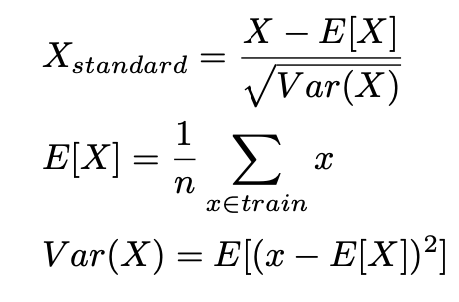

In [94]:
def E(x):

    n = len(x)
    sum = 0

    for i in range(n):

        sum += x[i] 

    sum /= n

    return sum


In [95]:
def var(x):

    n = len(x)
    e = E(x)

    sub = []

    for i in range(n):

        temp = (x[i] - e) ** 2

        sub.append(temp)

    return E(sub)

In [96]:
def norm(x):  

    n= len(x)

    # Fraction part
    v = var(x)
    v = math.sqrt(v)

    # E(x)
    e = E(x)

    ans = []

    for i in range(n):

        temp = (x[i] - e) / v
        ans.append(temp)

    return ans           

### Normalization of the train data

### Logistic Regression

$ w̄_{ML} = argmin ∑_{i=1}^{N}-y_{i}logȳ_{i}-(1-y_{i})log(1-ȳ_{i})$

with $ ȳ = f_{w}(x) = σ(W^TX) $ and 
$ σ(X) = \frac{1}{1+e^{-x}} $ 

The gradient is given by:

$∇_{w}l(ȳ_{i}, y_{i}) = (ȳ_{i} - y_{i})x_i$

In [111]:
def sigmoid(z):

    # if z == 0:

    #     return 0.5
    
    return 1 / (1 + np.exp(-z.astype(np.float)))

In [112]:
# L2 regularization and weight decay
def logistic_regression(X, y, learning_rate, weight_decay, num_iterations):

    # Initialize weights
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0

    # Gradient descent
    for i in range(num_iterations):

        # forward and backward passes
        z = np.dot(X, w) + b
        # print(z)
        a = sigmoid(z)
                                                    # L2
        dw = (1 / m) * np.dot(X.T, (a - y)) + (weight_decay / m) * w
        db = (1 / m) * np.sum(a - y)

        # Updating weights
        w = w - learning_rate * dw
        b = b - learning_rate * db

    # final weights and bias
    return w, b


In [113]:
X = df_train[[col for col in df_train.columns if col != 'Survived']]
X = np.matrix(X)
y = df_train['Survived']
y = np.matrix(y)

# parameters
learning_rate = 0.05
weight_decay = 0.001
num_iterations = 1000

# Train logistic regression model
w, b = logistic_regression(X, y, learning_rate, weight_decay, num_iterations)

print('w = ', w)
print('b = ', b)

# # Evaluate model on test set
y_pred = np.round(sigmoid(np.dot(X, w) + b))
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy}")



<ipython-input-111-c08305fd48f7>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return 1 / (1 + np.exp(-z.astype(np.float)))


w =  [[-2.35043041e-15  3.79888285e-15  3.79888285e-15 ... -2.35043041e-15
   3.79888285e-15 -2.34836936e-15]
 [ 1.08171050e-17  6.55843005e-17  6.55843005e-17 ...  1.08171050e-17
   6.55843005e-17  1.42507163e-17]
 [-1.52519295e-15  2.40505135e-15  2.40505135e-15 ... -1.52519295e-15
   2.40505135e-15 -1.52583162e-15]
 ...
 [ 6.49755205e-16 -1.05182855e-15 -1.05182855e-15 ...  6.49755205e-16
  -1.05182855e-15  6.46969296e-16]
 [-5.78322627e-15  9.38579444e-15  9.38579444e-15 ... -5.78322627e-15
   9.38579444e-15 -5.78080926e-15]
 [ 8.61408435e-16 -1.45372323e-15 -1.45372323e-15 ...  8.61408435e-16
  -1.45372323e-15  8.51589659e-16]]
b =  -15.130212819976862
Accuracy: 0.6161616161616161


### K-fold cross validation

we randomly sample from the train data fram until we have 5 different folds, then iterate from 1 to 5; the iteration number determines the validation set. We will train on all folds except the validation set.

In [118]:
def create_kfolds(dataset): #k = 5

    k = 5
    folds = []
    size = dataset.shape[0]
    num_of_elements = int(size / k)

    df1 = pd.DataFrame(columns = dataset.columns)
    df2 = pd.DataFrame(columns = dataset.columns)
    df3 = pd.DataFrame(columns = dataset.columns)
    df4 = pd.DataFrame(columns = dataset.columns)
    df5 = pd.DataFrame(columns = dataset.columns)

    new_sample = dataset.sample(n = num_of_elements)

    df1 = df1.append(new_sample, ignore_index=True)
    dataset.drop(new_sample.index, inplace=True)

    new_sample = dataset.sample(n = num_of_elements)

    df2 = df2.append(new_sample, ignore_index=True)
    dataset.drop(new_sample.index, inplace=True)

    new_sample = dataset.sample(n = num_of_elements)

    df3 = df3.append(new_sample, ignore_index=True)
    dataset.drop(new_sample.index, inplace=True)

    new_sample = dataset.sample(n = num_of_elements)

    df4 = df4.append(new_sample, ignore_index=True)
    dataset.drop(new_sample.index, inplace=True)

    new_sample = dataset.sample(n = num_of_elements)

    df5 = df5.append(new_sample, ignore_index=True)
    dataset.drop(new_sample.index, inplace=True)       

    return df1, df2, df3, df4, df5


def cross_val(df, x_cols, lr, wb, num_iterations):

    acc_ls = []
    bias_ls = []
    variance_ls = []

    df_temp = df.copy(deep=True)
    df1, df2, df3, df4, df5 = create_kfolds(df_temp)
    ls = [df1, df2, df3, df4, df5]

    for i in range(5):

        cv = ls[i]
        ts = []

        for j in range(5):

            if j != i:

                ts.append(ls[j])

        df_ts = pd.concat(ts, axis=0)

        x = df_ts[[col for col in df_train.columns if col != 'Survived']]
        x = np.matrix(x)
        y = df_ts['Survived']
        y = np.matrix(y)

        x_cv = cv[[col for col in df_train.columns if col != 'Survived']]
        x_cv = np.matrix(x_cv)
        y_cv = cv['Survived']
        y_cv = np.matrix(y)

        # print((x, y, lr, wb, num_iterations))

        w, b = logistic_regression(x, y, lr, wb, num_iterations)

        # # Evaluate model
        y_pred = np.round(sigmoid(np.dot(x_cv, w) + b))

        accuracy = np.mean(y_pred == y_cv)
        acc_ls.append(accuracy)

        bias = (1 / len(y_cv)) * np.sum(y_pred - y_cv)
        bias_ls.append(bias)
        
        variance = (1 / len(y_cv)) * np.sum((y_pred - np.power(np.mean(y_pred), 2)))
        variance_ls.append(variance)


    return acc_ls, bias_ls, variance_ls


In [ ]:
weight_decay_ls = [0.1, 0.01, 0.001]
learning_rate_ls = [0.1, 0.5, 0.05]

x_cols = df_train[[col for col in df_train.columns if col != 'Survived']]

t_dict = {}
cv_dict = {}

for i in weight_decay_ls:
  
    for j in learning_rate_ls:

        s = ''
        s = 'decay rate = ' + str(i) + ' learning rate = ' + str(j)

        accuracies = []
        biases = []
        variances = []

        for k in range(10):

            accuracy, bias, variance = cross_val(df_train, x_cols, j, i, 10)
            
            # Append evaluation metrics to lists
            accuracies.append(accuracy)
            biases.append(bias)
            variances.append(variance)

print(accuracies)
            # biases.append(bias)
            # variances.append(variance)


<ipython-input-111-c08305fd48f7>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return 1 / (1 + np.exp(-z.astype(np.float)))


[[0.6179775280898876, 0.6081460674157303, 0.6334269662921348, 0.3904494382022472, 0.3904494382022472], [0.37640449438202245, 0.37780898876404495, 0.3946629213483146, 0.6109550561797753, 0.37780898876404495], [0.39325842696629215, 0.3904494382022472, 0.6207865168539326, 0.6348314606741573, 0.39325842696629215], [0.3946629213483146, 0.6109550561797753, 0.6165730337078652, 0.6264044943820225, 0.6193820224719101], [0.6109550561797753, 0.6207865168539326, 0.37780898876404495, 0.39325842696629215, 0.37640449438202245], [0.37640449438202245, 0.598314606741573, 0.6165730337078652, 0.6264044943820225, 0.6137640449438202], [0.39325842696629215, 0.3904494382022472, 0.6151685393258427, 0.37640449438202245, 0.37640449438202245], [0.3946629213483146, 0.6292134831460674, 0.6264044943820225, 0.6151685393258427, 0.6025280898876404], [0.3946629213483146, 0.6179775280898876, 0.6264044943820225, 0.37640449438202245, 0.3946629213483146], [0.6165730337078652, 0.39325842696629215, 0.6278089887640449, 0.37780